In [99]:
import seaborn as sns;
import pandas as pd;
import numpy as np;
from sklearn.neighbors import KNeighborsClassifier as KNN;

In [100]:
df = pd.read_csv('../../data/IBM_HR_ATTRITION.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [83]:
df = df.sample(20)
df = df.drop(['BusinessTravel','Department','EducationField','EmployeeCount','Gender','RelationshipSatisfaction','JobRole','StockOptionLevel','MaritalStatus','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','StandardHours','TotalWorkingYears','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement'],axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education
1379,27,Yes,1337,22,3
447,35,No,619,1,3
208,40,No,1151,9,5
522,37,No,1225,10,2
242,41,No,1411,19,2
484,31,No,525,6,4
189,51,No,313,3,3
362,21,No,895,9,2
425,50,No,1099,29,4
1236,36,Yes,1456,13,5


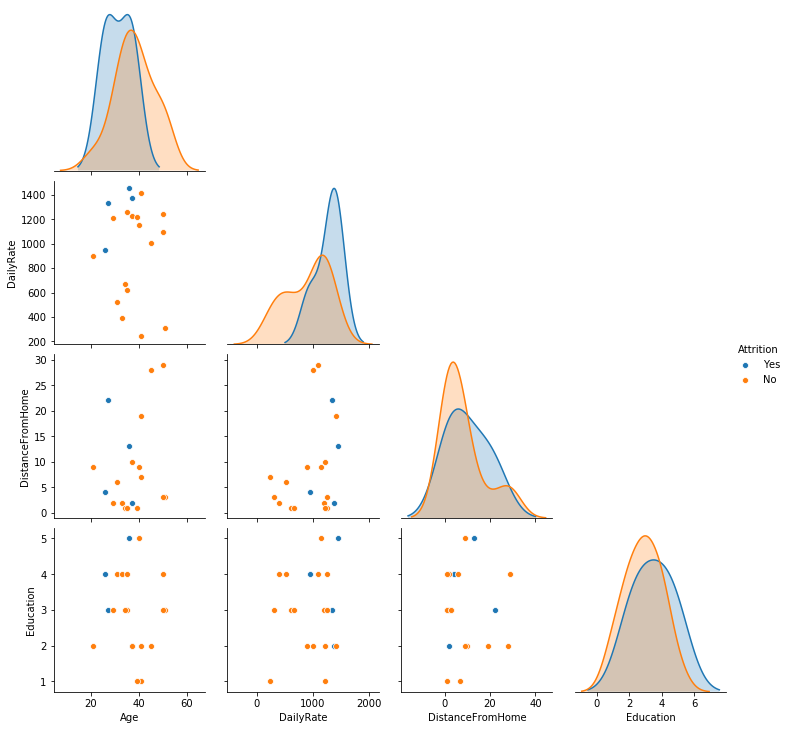

In [84]:
sns.pairplot(df, hue='Attrition', corner='True') # hue = variable cible

In [87]:
Y = df['Attrition'].astype('category').cat.codes # On veut afficher le type de fleur
X = df.drop('Attrition', axis='columns') # On garde que les dimension de la fleur

In [88]:
X.shape, Y.shape # Pour connaitre les dimensions de notre dataset

((20, 4), (20,))

In [89]:
# Créer l'algo
knn = KNN(n_neighbors=3)

In [91]:
# Entrainer un modèle
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [92]:
predictions = knn.predict(X)

In [93]:
# Créer une mesure de performance
def accuracy(preds, target):
    M = target.shape[0] # Nombre d'exemple
    total_correctes = (preds == target).sum()
    accuracy = total_correctes / M
    return accuracy

In [94]:
predictions == Y

1379     True
447      True
208      True
522      True
242     False
484      True
189      True
362      True
425      True
1236     True
1225     True
2        True
1189     True
265      True
847      True
596      True
477      True
746      True
293     False
400      True
dtype: bool

In [95]:
accuracy(predictions, Y)

0.9

In [96]:
def plot_knn_decision(K):
    knn = KNN(n_neighbors=K)
    # entrainer sur moon
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    print('K = ', K)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2) # mesh veut dire grille
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])
    

In [98]:
# Créer le maillage
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)

NameError: name 'X0_range' is not defined

In [ ]:
mesh_df = pd.DataFrame({"X0": X0_mesh,
                        "X1": X1_mesh})

In [ ]:
mesh_predictions = knn.predict(mesh_df)

In [97]:
plot_knn_decision(K=1)

NameError: name 'mesh_df' is not defined